In [1]:
#Airbnb Munich dataset from 24th of December, 2020 - see: http://insideairbnb.com/get-the-data.html
import pandas as pd

calendar_df = pd.read_csv("./Data/calendar.csv")
listings_df = pd.read_csv("./Data/listings.csv")


In [2]:
###########################################################################################################
# Question 1: In which months are most Airbnb listings still available (total and by room type)?
###########################################################################################################

In [3]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,172672,2020-12-24,f,$49.00,$49.00,1,4
1,172672,2020-12-25,f,$49.00,$49.00,1,4
2,97945,2020-12-30,f,$80.00,$80.00,2,90
3,97945,2020-12-31,f,$80.00,$80.00,2,90
4,97945,2021-01-01,f,$80.00,$80.00,2,90


In [4]:
# Select relevant columns 
calendar_df = calendar_df[["listing_id", "date", "available"]]
calendar_df.head()

,listing_id,date,available
0,172672,2020-12-24,f
1,172672,2020-12-25,f
2,97945,2020-12-30,f
3,97945,2020-12-31,f
4,97945,2021-01-01,f


In [5]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
dtype: object

In [6]:
print("We changed the type of the two columns date and available:")
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
calendar_df["available"] = calendar_df["available"].replace({'t': True, 'f': False})

calendar_df.dtypes

We changed the type of the two columns date and available:


listing_id             int64
date          datetime64[ns]
available               bool
dtype: object

In [7]:
print("Please find some important data for the calender dataframe:")
print("- The number of rows is: " + str(f"{len(calendar_df.index):,}"))
print("- The number of Nan values for each column is 0:")
print(calendar_df.isnull().sum())


Please find some important data for the calender dataframe:
- The number of rows is: 1,754,920
- The number of Nan values for each column is 0:
listing_id    0
date          0
available     0
dtype: int64


In [8]:
print("The Airbnb Munich dataset originally includes data between " + min(calendar_df['date']).strftime("%Y/%m/%d") + " and " + max(calendar_df['date']).strftime("%Y/%m/%d") +".")
print("As we are only interested in data from 2021, we skip the December 2020 data.")
calendar_df = calendar_df.loc[(calendar_df["date"] >= "2021-01-01") & (calendar_df["date"] <= "2021-12-31")]
print("The Airbnb Munich dataset now includes data between " + min(calendar_df['date']).strftime("%Y/%m/%d") + " and " + max(calendar_df['date']).strftime("%Y/%m/%d") +".")


The Airbnb Munich dataset originally includes data between 2020/12/24 and 2021/12/29.
As we are only interested in data from 2021, we skip the December 2020 data.
The Airbnb Munich dataset now includes data between 2021/01/01 and 2021/12/29.


In [9]:
# number of listings per month:
no_listings_per_month=calendar_df[['listing_id']].groupby([calendar_df['date'].dt.year.rename('year'), calendar_df['date'].dt.month.rename('month')]).count()
no_listings_per_month.rename(columns={'listing_id':'number_of_listings'}, inplace=True)
print (no_listings_per_month)

print( "\n" + "The graphic shows that there are less rooms listed for some months.") 
print("December is the month with the lowest amount of rooms listed at Airbnb - Keep in mind that we also have less data provided for that month (data for the 30th and 31st of December is missing)")

            number_of_listings
year month                    
2021 1                  149048
     2                  134624
     3                  149048
     4                  144240
     5                  149048
     6                  144240
     7                  149048
     8                  149048
     9                  144240
     10                 149048
     11                 144240
     12                 110608

The graphic shows that there are less rooms listed for some months.
December is the month with the lowest amount of rooms listed at Airbnb - Keep in mind that we also have less data provided for that month (data for the 30th and 31st of December is missing)


In [10]:
# merge the two dataframes listings_df and calendar_df 
calendar_df_with_room_types=pd.merge(calendar_df,listings_df, left_on='listing_id',right_on='id')
# select relevant columns
calendar_df_with_room_types = calendar_df_with_room_types[["date", "available", "listing_id", "room_type"]]

print("Question 1a: In which months are most Airbnb listings still available (total)?", end="\n\n")
sum_1a = calendar_df_with_room_types.groupby([calendar_df_with_room_types['date'].dt.year.rename('year'), calendar_df_with_room_types['date'].dt.month.rename('month'), 'available'])['listing_id'].sum()
result_1a = (sum_1a / sum_1a.groupby(level=[0, 1]).transform("sum")*100)
result_1a_df = result_1a.to_frame().rename(columns = {'listing_id':'percentage'}) #Convert series to dataframe and rename column
print(result_1a_df, end="\n\n")
print("February 2021 is the month with the highest availablity, followed by March 2021 and January 2021. This makes sense,")
print("if you think about the current Corona situation. People hesitate to book a room soon.")
print("October 2021 is the busiest month regarding the availablity rate. People look forward to go to the Octoberfest again.")


print("Question 1b: In which months are most Airbnb listings still available (by room_type)?", end="\n\n")
sum_1b = calendar_df_with_room_types.groupby([calendar_df_with_room_types['date'].dt.year.rename('year'), calendar_df_with_room_types['date'].dt.month.rename('month'), 'available', 'room_type'])['listing_id'].sum()
result_1b = sum_1b / sum_1b.groupby(level=[0, 1]).transform("sum")*100
result_1b_df = result_1b.to_frame().rename(columns = {'listing_id':'percentage'}) #Convert series to dataframe and rename column
pd.set_option('display.max_rows', 1000)
print(result_1b_df, end="\n\n")
print("This data is hard to read. Let's split the data and make some nice graphics and try out two different python libaries.")


Question 1a: In which months are most Airbnb listings still available (total)?

                      percentage
year month available            
2021 1     False       32.547788
           True        67.452212
     2     False       28.155575
           True        71.844425
     3     False       32.533568
           True        67.466432
     4     False       51.661307
           True        48.338693
     5     False       51.846419
           True        48.153581
     6     False       57.023497
           True        42.976503
     7     False       66.390518
           True        33.609482
     8     False       65.987794
           True        34.012206
     9     False       68.966096
           True        31.033904
     10    False       70.026234
           True        29.973766
     11    False       68.819523
           True        31.180477
     12    False       69.063332
           True        30.936668

February 2021 is the month with the highest availablity, foll

In [11]:
# The final dateframes from here also serve as input for the second graphic (see below)
result_1b_df_ind = result_1b_df.reset_index()

print("Percentage of available rooms by month and room type:", end="\n\n")
result_1b_available_df_ind= result_1b_df_ind[result_1b_df_ind['available'] == True]
available_df = result_1b_available_df_ind.pivot('month', 'room_type', 'percentage')
print(available_df, end="\n\n\n\n")

print("Percentage of unavailable rooms by month and room type:", end="\n\n")
result_1b_unvailable_df_ind= result_1b_df_ind[result_1b_df_ind['available'] == False]
unavailable_df = result_1b_unvailable_df_ind.pivot('month', 'room_type', 'percentage')
print(unavailable_df, end="\n\n\n\n")


print("Entire home/apartments, private rooms and shared rooms have the hightest availability rate in Jan, Feb and Mar 2021.")
print("Only hotel rooms are slightly more booked in January 2021 compared to the other months - availability rate is only 0.9%")

#Hint: the sum of values from the first row of the two graphhics is 100 (equivalent for all other rows)
#first row: 33.857044 + 0.897881 + 31.324853 + 1.372434 + 21.252804 + 0.512711 + 10.579063 + 0.203210 = 100 

Percentage of available rooms by month and room type:

room_type  Entire home/apt  Hotel room  Private room  Shared room
month                                                            
1                33.857044    0.897881     31.324853     1.372434
2                35.504955    1.255087     33.653065     1.431317
3                33.708487    1.240062     31.208854     1.309028
4                23.684445    1.225978     22.561751     0.866519
5                23.879644    1.167204     22.283710     0.823023
6                21.558218    0.980823     19.718704     0.718758
7                16.710940    1.010677     15.438087     0.449779
8                16.956874    1.047894     15.557659     0.449779
9                15.808662    0.952761     13.792401     0.480079
10               15.262989    0.989792     13.240892     0.480093
11               15.414216    0.925830     14.360202     0.480230
12               15.383001    0.857748     14.215721     0.480199



Percentage of unav

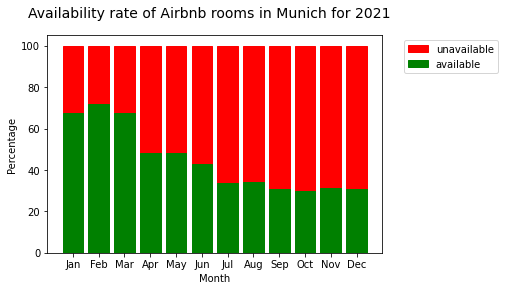

In [12]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# Set the labels
fig = plt.figure()
fig.suptitle('Availability rate of Airbnb rooms in Munich for 2021', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Percentage', fontsize=10)

# Transform the data 
result_1a_df_ind = result_1a_df.reset_index()
available = np.array(result_1a_df_ind[result_1a_df_ind['available'] == True].iloc[:,[3]].T.values[0])  # Transpose (.T)
unavailable = np.array(result_1a_df_ind[result_1a_df_ind['available'] == False].iloc[:,[3]].T.values[0])

# Make the stacked bar plot
columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pos = np.arange(len(columns))
p1 = plt.bar(pos, np.add(unavailable , available), color='red', edgecolor='red', label= 'unavailable')
p2 = plt.bar(pos, available, color='green', edgecolor='green', label= 'available')
plt.xticks(pos, columns)

# Create a legend
fontP = FontProperties()
fontP.set_size('medium')
plt.legend(handles=[p1, p2], bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

# Show graphic
plt.show()

In [13]:
import altair as alt
import calendar

# Change from pivot table to normal table format; add column available
def prepare_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['month', 'room_type', 'values']
    df['available'] = name
    return df

# Settings for displaying the chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
order = ['available', 'unavailable'] 

# Prepare the data (dateframes see two cells above)
unavailable_df = prepare_df(unavailable_df, 'unavailable')
available_df = prepare_df(available_df, 'available')
df = pd.concat([available_df, unavailable_df]) # join the two dataframes
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x]) # convert values from month column to month name


# Make the stacked bar plot
chart = alt.Chart(df, title=['Availability rate of different Airbnb rooms in Munich for 2021', '   ']).mark_bar().encode(

    # Use room type as x-axis 
    x=alt.X('room_type:N', title=None),

    # Use percentage as y-axis 
    y=alt.Y('sum(values):Q',
        axis=alt.Axis(
            grid=False,
            title='Percentage')),

    # Use month as the set of columns to be represented in each group
    column=alt.Column('month:N',  title=None, sort=months),

    # Set the colours 
    color=alt.Color('available:N', sort=order, 
            scale=alt.Scale(
                # make it look pretty with an enjoyable color pallet
                range=['green', 'red']
            ), title =None, 
        ), 
    # Determine the order for displaying (we want available on the bottom)
    order="order:Q" 
    )

#Configure the chart and display it
chart.configure_view(strokeOpacity=0)

alt.Chart(...)

In [14]:
###########################################################################################################
# Question 2: In which Munich areas (zip codes) are the best Airbnb listings (according to total rating)?
###########################################################################################################

In [15]:
pd.set_option('display.max_columns', 100)
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20201224153430,2020-12-30,Deluxw-Apartm. with roof terrace,"<b>The space</b><br />We offer a modern, quiet...",We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,https://www.airbnb.com/users/show/517685,Angelika,2011-04-18,"Munich, Bayern, Germany",Ich freue mich auf viele internationale Gäste!...,NaN,NaN,100%,t,https://a0.muscache.com/im/users/517685/profil...,https://a0.muscache.com/im/users/517685/profil...,Hadern,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Munich, Bavaria, Germany",Hadern,NaN,48.11476,11.48782,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Coffee maker"", ""Essentials"", ""Bed linens"", ""...",$80.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,NaN,t,0,0,0,5,2020-12-30,130,0,0,2011-12-20,2019-10-03,97.0,10.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,1.18
1,114695,https://www.airbnb.com/rooms/114695,20201224153430,2020-12-24,Apartment Munich/East with sundeck,<b>The space</b><br />It´s a quiet and sunny a...,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,https://www.airbnb.com/users/show/581737,Stephan,2011-05-12,"Munich, Bayern, Germany",I am looking forward to meet interesting peopl...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/581737/profil...,https://a0.muscache.com/im/users/581737/profil...,Berg am Laim,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Berg am Laim,NaN,48.11923,11.63726,Entire apartment,Entire home/apt,5,NaN,1 bath,1.0,3.0,"[""Hot water"", ""Coffee maker"", ""Essentials"", ""B...",$95.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,52,2020-12-24,53,0,0,2011-07-08,2019-10-06,95.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,2,2,0,0,0.46
2,127383,https://www.airbnb.com/rooms/127383,20201224153430,2020-12-24,City apartment next to Pinakothek,<b>The space</b><br />My cosy apartment is loc...,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,https://www.airbnb.com/users/show/630556,Sonja,2011-05-26,"Munich, Bayern, Germany","Hi, mein Name ist Sonja und ich freue mich net...",within a few hours,100%,88%,t,https://a0.muscache.com/im/users/630556/profil...,https://a0.muscache.com/im/users/630556/profil...,Maxvorstadt,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,NaN,Maxvorstadt,NaN,48.15198,11.56486,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Pack \u2019n Play/travel crib"",...",$99.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,NaN,t,9,9,9,9,2020-12-24,93,11,0,2011-06-04,2020-10-20,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.80
3,170815,https://www.airbnb.com/rooms/170815,20201224153430,2020-12-24,Your own f

In [16]:
# Select relevant columns 
# Do not use neighboorhood_cleansed since there is no geo data available for free regarding the districts of Munich

listings_data_df = listings_df[["id", "latitude", "longitude", "review_scores_rating"]]
listings_data_df.head()

,id,latitude,longitude,review_scores_rating
0,97945,48.11476,11.48782,97.0
1,114695,48.11923,11.63726,95.0
2,127383,48.15198,11.56486,98.0
3,170815,48.16132,11.54154,91.0
4,171749,48.10583,11.57843,98.0


In [17]:
listings_data_df.dtypes

id                        int64
latitude                float64
longitude               float64
review_scores_rating    float64
dtype: object

In [18]:
print("- The number of rows is: " + str(f"{len(listings_data_df.index):,}"))

- The number of rows is: 4,815


In [21]:
# Use latitude and longitude as input to get the zip code of the Airbnb listing via geopandas
import geopandas as gpd
from shapely.geometry import Point

# Source for map data: https://www.suche-postleitzahl.org/plz-karte-erstellen
gdf_locations = gpd.read_file('./Data/plz-5stellig.shp', dtype={'plz': str})
# Data transformation
listings_data_df = listings_data_df.copy()
listings_data_df['loc'] = listings_data_df.apply(lambda x: list([x['latitude'], x['longitude']]),axis=1).copy()
listings_data_df['loc'] = listings_data_df['loc'].apply(lambda x: Point(x[1],x[0]))
# Retrieving map data
geo_data = gpd.GeoDataFrame(listings_data_df,geometry=listings_data_df['loc'],crs=gdf_locations.crs).drop(['loc'], axis=1)
geo_result = gpd.sjoin(geo_data,gdf_locations,how='left',op='within')
geo_result.head()

,id,latitude,longitude,review_scores_rating,geometry,index_right,einwohner,note,plz,qkm
0,97945,48.11476,11.48782,97.0,POINT (11.48782 48.11476),5905,22853,81375 MÃ¼nchen,81375,3.095634
1,114695,48.11923,11.63726,95.0,POINT (11.63726 48.11923),5920,17950,81671 MÃ¼nchen,81671,2.296020
2,127383,48.15198,11.56486,98.0,POINT (11.56486 48.15198),5879,12747,80798 MÃ¼nchen,80798,0.488142
3,170815,48.16132,11.54154,91.0,POINT (11.54154 48.16132),5871,20445,80637 MÃ¼nchen,80637,2.045222
4,171749,48.10583,11.57843,98.0,POINT (11.57843 48.10583),5916,17735,81547 MÃ¼nchen,81547,2.301460


In [ ]:
# Convert geodataframe to pandas-dataframe
munich_df  = pd.DataFrame(geo_result)
# Remove non-relevant columns
munich_df = munich_df.drop(columns=['index_right',  'geometry', 'einwohner', 'latitude', 'longitude', 'qkm', 'note'])
munich_df.head()

In [ ]:
print("- The number of rows is: " + str(f"{len(munich_df.index):,}"))

In [ ]:
# Remove null values 
print(munich_df.isnull().sum())
munich_df = munich_df.dropna()

In [ ]:
#Display amount of the different review_scores for each zip code
munich_df.groupby(['plz','review_scores_rating']).size().unstack()


In [ ]:
# Calculate mean review_score for each zip code
res_2 = munich_df.groupby(['plz']).agg(['count','mean'])
res_2  = res_2 .drop(columns=['id'])
res_2 = res_2.reset_index()
print(res_2.head(100))
print()
print("We can see that the ratings are very high for all listings (all above 90).")
print("Some of the zip codes only have a few ratings.")

In [ ]:
# Get polygon geometry data for the plot
pd.set_option('display.max_rows', 100)
plot_input_data = pd.merge(left=res_2, right=gdf_locations, on='plz', how='left')
plot_input_data = plot_input_data.drop(columns=['einwohner', 'note', 'qkm'])
plot_input_data.head(100)

In [ ]:
#Replace values with Nan which have less than 10 ratings in total
minimum_number = 10
plot_input_data[plot_input_data.columns[3]].where((plot_input_data[plot_input_data.columns[2]] > minimum_number) ,np.NaN,inplace=True) 
plot_input_data = plot_input_data.sort_values(by=plot_input_data.columns[3], ascending=False)
plot_input_data.head(100)

In [ ]:
from geopandas import GeoDataFrame
# Create the plot
plt.style.use('seaborn')
%matplotlib inline
fig, ax = plt.subplots(figsize=(28,14))

GeoDataFrame(plot_input_data).plot(ax=ax, column=plot_input_data.columns[3], categorical=False, legend=True, cmap='summer_r',
                                   missing_kwds=dict(color='grey'))

#Set the title
ax.set_title('Average rating of Airbnb listings in Munich for each zip code', pad=10, fontsize=18)

# Remove axis labels for latitude and longitude
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set(facecolor='lightgrey');

# Add zip code labels
plot_input_data.apply(lambda x: ax.annotate(text=x.plz, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

print("Annotation: Zip codes with less than 10 ratings were excluded from the analysis and marked in dark gray.")
print("Results: It seems to be that most of the popular areas are placed in the West of Munich.")
print("This area has very good traffic connections to the inner city and also to the Oktoberfest.")
print("As some the zip codes in the West of Munich like Laim have lower house/appartment prices compared to other areas,") 
print("let's investigate the relationship between listing price and listing (total) rating")

In [ ]:
# same plot with all Airbnb listings included in the figure

from geopandas import GeoDataFrame
# Create the plot
plt.style.use('seaborn')
%matplotlib inline
fig, ax = plt.subplots(figsize=(28,14))

GeoDataFrame(plot_input_data).plot(ax=ax, column=plot_input_data.columns[3], categorical=False, legend=True, cmap='summer_r',
                                   missing_kwds=dict(color='grey'))

listings_data_df['const']=1
GeoDataFrame(listings_data_df).plot(ax=ax, column='const', categorical=False, legend=False, cmap='gray');

#Set the title
ax.set_title('Average rating of Airbnb listings in Munich for each zip code', pad=10, fontsize=18)

# Remove axis labels for latitude and longitude
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set(facecolor='lightgrey');

print("Most of the Airbnb listings are located near to the inner city.")


In [ ]:
###########################################################################################################
# Question 3: Do cheaper listings have a lower rating compared to more expensive listings? 
###########################################################################################################


In [ ]:
# Data selection
listings_data_df_price = listings_df[["id", "price", "review_scores_rating"]]
listings_data_df_price.head()

In [ ]:
# Data cleaning of coloumn price
listings_data_df_price["price"] = listings_data_df_price["price"].str.replace("$", '',regex=True).str.replace(",", '',regex=True).astype(float)
listings_data_df_price.head()

In [ ]:
listings_data_df_price.dtypes

In [ ]:
listings_data_df_price.isnull().sum()
# As NaN values are not taken into account in the scotter plot, we do not need to remove them.

In [ ]:
print(listings_data_df_price[["price", "review_scores_rating"]].describe())
print()
print("The high standard deviation (247) indicates that the data are more spread out.")
print("Also the maximum is very high (8255).")
print("There is also at least one price value, which is equals 0 (see minimum).")

In [ ]:
# Let's have a look at the listings with a price of 0. 
# All rows with price values of 0, also have NaN rating values.
# As NaN values are not taken into account in the scotter plot, we do not need to remove them.
listings_data_df_price[listings_data_df_price["price"] == 0]

In [ ]:
# Scatter plot to describe relationship between price and (total) rating
import matplotlib.pyplot as plt
plt.scatter(listings_data_df_price['price'],listings_data_df_price['review_scores_rating'])
plt.xlabel('Price in $')
plt.ylabel('Total review score')
plt.title('Scatter plot of total review rating vs. price')
plt.show()

print("From the scatter plot, we can see the outliers.")

In [ ]:
# Remove outliers by querying the rows with a price less than 600$
price_less_than_600 = listings_data_df_price.query('price <= 600')
count_outliers = len(listings_data_df_price[listings_data_df_price['price'] > 600])
percentage_outliers = len(listings_data_df_price[listings_data_df_price['price'] > 600]) / listings_data_df_price.shape[0] * 100
print('We found {} rows ({:.2f}%) with a price less than 600$.'.format(count_outliers, percentage_outliers))

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(price_less_than_600['price'],price_less_than_600['review_scores_rating'])
plt.xlabel('Price in $')
plt.ylabel('Total review score')
plt.title('Scatter plot of total review rating vs. price (price less than 600$)')
plt.show()

print("From the scatter plot, we can see that there is hardly no relationship between total review score and price.")
print("Many listings in the lower and medium price range also have very high ratings.")

In [ ]:
import seaborn as sb

pearsoncorr = price_less_than_600[["price", "review_scores_rating"]].corr(method='pearson')

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu',
            annot=True,
            linewidth=0.5)
print("From the results of the correlation coefficient, we come to the same conclusion:")
print("The correlation coefficient of -0.011 is considered as negligible correlation.")

In [ ]:
from platform import python_version

print(python_version())
